### Comparazione vari SLIM Elsatic

In [2]:
import os 
import sys
while os.path.split(os.getcwd())[1] != 'RecSysChallenge2023-Team':
    os.chdir('..')
sys.path.insert(1, os.getcwd())

import numpy as np 

In [3]:
path_save= "Daniele/Recommenders/SSLIM_Elastic/saved_models"
if not os.path.exists(path_save):
    os.makedirs(path_save)

In [4]:
from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample
from Evaluation.Evaluator import EvaluatorHoldout

import Daniele.Utils.MyDataManager as dm 
import Daniele.Utils.MatrixManipulation as mm
import Daniele.Utils.SaveSparceMatrix as ssm

URMv = dm.getURMviews()
URMo = dm.getURMopen()
ICMt=dm.getICMt()
ICMl=dm.getICMl()

name="train.csv"
dir = os.path.join(path_save,name)
if not os.path.exists(dir):
    URMv_train, URMv_test = split_train_in_two_percentage_global_sample(URMv, train_percentage = 0.80)

    ssm.saveMatrix(dir,URMv_train)

    name="test.csv"
    dir = os.path.join(path_save,name)
    ssm.saveMatrix(dir,URMv_test)

    urm_def = mm.defaultExplicitURM(urmv=URMv_train,urmo=URMo,icml=ICMl,icmt=ICMt, normalize=True, add_aug=True,appendICM=True)
    name="urm_def.csv"
    dir = os.path.join(path_save,name)
    ssm.saveMatrix(dir,urm_def)

    urm_bin = mm.defaultExplicitURM(urmv=URMv_train,urmo=URMo, normalize=False, add_aug=True)
    urm_bin.data = np.ones(len(urm_bin.data))
    name="urm_bin.csv"
    dir = os.path.join(path_save,name)
    ssm.saveMatrix(dir,urm_bin)

else:
    URMv_train=ssm.readMatrix(dir)

    name="test.csv"
    dir = os.path.join(path_save,name)
    URMv_test=ssm.readMatrix(dir)

    name="urm_def.csv"
    dir = os.path.join(path_save,name)
    urm_def = ssm.readMatrix(dir)

    name="urm_bin.csv"
    dir = os.path.join(path_save,name)
    urm_bin = ssm.readMatrix(dir)



/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team


In [5]:
import os 
import sys
while os.path.split(os.getcwd())[1] != 'RecSysChallenge2023-Team':
    os.chdir('..')
sys.path.insert(1, os.getcwd())

import numpy as np

### SLIIM-Elastic REFERENCE 0.05732

In [5]:
from Recommenders.SLIM.SLIMElasticNetRecommender import MultiThreadSLIM_SLIMElasticNetRecommender
name="slim_reference"
dir = os.path.join(path_save,name)

slim_reference = MultiThreadSLIM_SLIMElasticNetRecommender(URM_train=urm_bin)
if not os.path.exists(dir+".zip"):
    
    slim_reference.fit(alpha=7.3447282e-7, l1_ratio=0.007759, topK=739)
    slim_reference.save_model(path_save,name)
else:
    slim_reference.load_model(path_save,name)

SLIMElasticNetRecommender: URM Detected 3461 (12.4%) items with no interactions.
SLIMElasticNetRecommender: Loading model from file 'Daniele/Recommenders/SSLIM_Elastic/saved_modelsslim_reference'
SLIMElasticNetRecommender: Loading complete


### SLIM-Elastic Submit hybrid 

In [6]:
from Recommenders.SLIM.SLIMElasticNetRecommender import MultiThreadSLIM_SLIMElasticNetRecommender
name="submit_hybrid_federico"
dir = os.path.join(path_save,name)

submit_hybrid_federico = MultiThreadSLIM_SLIMElasticNetRecommender(URM_train=urm_bin)
if not os.path.exists(dir+".zip"):
    
    submit_hybrid_federico.fit(alpha=0.003271, l1_ratio=0.006095, topK=884)
    submit_hybrid_federico.save_model(path_save,name)
else:
    submit_hybrid_federico.load_model(path_save,name)

SLIMElasticNetRecommender: URM Detected 3461 (12.4%) items with no interactions.
SLIMElasticNetRecommender: Loading model from file 'Daniele/Recommenders/SSLIM_Elastic/saved_modelssubmit_hybrid_federico'
SLIMElasticNetRecommender: Loading complete


### SLIM-Elastic opt HIGH

In [6]:
from Recommenders.SLIM.SLIMElasticNetRecommender import MultiThreadSLIM_SLIMElasticNetRecommender
name="slim_elastic_high"
dir = os.path.join(path_save,name)

slim_elastic_high = MultiThreadSLIM_SLIMElasticNetRecommender(URM_train=urm_bin)
if not os.path.exists(dir+".zip"):
    
    # {'alpha': 0.002930092866966509, 'l1_ratio': 0.006239337272696024, 'topK': 882} -> MAP 0.0422894
    slim_elastic_high.fit(alpha=0.002930092866966509, l1_ratio=0.006239337272696024, topK=882)
    slim_elastic_high.save_model(path_save,name)
else:
    slim_elastic_high.load_model(path_save,name)

SLIMElasticNetRecommender: URM Detected 3461 (12.4%) items with no interactions.
SLIMElasticNetRecommender: Loading model from file 'Daniele/Recommenders/SSLIM_Elastic/saved_modelsslim_elastic_high'
SLIMElasticNetRecommender: Loading complete


### SSLIIM BPR

In [10]:
from Recommenders.SLIM.Cython.SLIM_BPR_Cython import SLIM_BPR_Cython
name="sslim01"
dir = os.path.join(path_save,name)

sslim_recommender = SLIM_BPR_Cython(URM_train=urm_def)
if not os.path.exists(dir+".zip"):
    #{'topK': 51, 'epochs': 15, 'symmetric': True, 'sgd_mode': 'adam', 'lambda_i': 1e-05, 'lambda_j': 0.003215687724797301, 'learning_rate': 0.007114410195895492} -> MAP 0.0078853
    sslim_recommender.fit(topK= 51, epochs=15,symmetric=True, sgd_mode = 'adam', lambda_i = 1e-05, lambda_j=0.003215687724797301, learning_rate = 0.007114410195895492)
    sslim_recommender.save_model(path_save,name)
else:
    sslim_recommender.load_model(path_save,name)

   

SLIM_BPR_Recommender: URM Detected 2 ( 0.0%) users with no interactions.
SLIM_BPR_Recommender: Loading model from file 'Daniele/Recommenders/SSLIM_Elastic/saved_modelssslim01'
SLIM_BPR_Recommender: Loading complete


### Hybrid BPR Elastic

In [9]:
from Recommenders.KNN.ItemKNNCustomSimilarityRecommender import ItemKNNCustomSimilarityRecommender
alpha = 0.7

BPR_Elastic_7= ItemKNNCustomSimilarityRecommender(urm_bin)
BPR_Elastic_7.fit((1 - alpha) * sslim_recommender.W_sparse + alpha* slim_elastic_high.W_sparse)

ItemKNNCustomSimilarityRecommender: URM Detected 3461 (12.4%) items with no interactions.


### Hybrid BPR - SLIM Elastic

In [10]:
from Daniele.Recommenders.Hybrid_fede.hybrid import SSLIMRP3BetaKNNRecommender
from Recommenders.BaseSimilarityMatrixRecommender import BaseItemSimilarityMatrixRecommender
RP3Beta_SLIM = SSLIMRP3BetaKNNRecommender(urm_bin)


class Hybrid (BaseItemSimilarityMatrixRecommender):

    def insert_recommenders(self,sslim, elastic,alpha = 0.2):
        self.sslim = sslim 
        self.elastic = elastic
        self.alpha = alpha

    def _compute_item_score(self, user_id_array, items_to_compute=None):
            

            w1 = self.sslim._compute_item_score(user_id_array)
            w1 = w1 / np.linalg.norm(w1, 2)

            w2 = self.elastic._compute_item_score(user_id_array)
            w2 = w2 / np.linalg.norm(w2, 2)

            
            item_weights = self.alpha * w1 + (1 - self.alpha) * w2

            return item_weights



BPR_Elastic_cis_2 = Hybrid(urm_bin)
BPR_Elastic_cis_2.insert_recommenders(sslim_recommender,slim_elastic_high,0.2)



RP3BetaKNNRecommender: URM Detected 3461 (12.4%) items with no interactions.
Recommender_Base_Class: URM Detected 3461 (12.4%) items with no interactions.
Recommender_Base_Class: URM Detected 3461 (12.4%) items with no interactions.
Recommender_Base_Class: URM Detected 3461 (12.4%) items with no interactions.


### Users group

In [13]:
import numpy as np 
import scipy.sparse as sps

profile_length = np.ediff1d(sps.csr_matrix(URMv).indptr)
profile_length, profile_length.shape

block_size = int(len(profile_length)*0.05)
sorted_users = np.argsort(profile_length)

for group_id in range(0, 20):
    start_pos = group_id * block_size
    end_pos = min((group_id+1) * block_size, len(profile_length))
    
    users_in_group = sorted_users[start_pos:end_pos]
    
    users_in_group_p_len = profile_length[users_in_group]
    
    print("Group {}, #users in group {}, average p.len {:.2f}, median {}, min {}, max {}".format(
        group_id, 
        users_in_group.shape[0],
        users_in_group_p_len.mean(),
        np.median(users_in_group_p_len),
        users_in_group_p_len.min(),
        users_in_group_p_len.max()))

Group 0, #users in group 2081, average p.len 6.98, median 7.0, min 2, max 9
Group 1, #users in group 2081, average p.len 9.43, median 9.0, min 9, max 10
Group 2, #users in group 2081, average p.len 10.69, median 11.0, min 10, max 11
Group 3, #users in group 2081, average p.len 11.83, median 12.0, min 11, max 12
Group 4, #users in group 2081, average p.len 12.88, median 13.0, min 12, max 13
Group 5, #users in group 2081, average p.len 13.92, median 14.0, min 13, max 14
Group 6, #users in group 2081, average p.len 14.92, median 15.0, min 14, max 15
Group 7, #users in group 2081, average p.len 16.00, median 16.0, min 15, max 17
Group 8, #users in group 2081, average p.len 17.22, median 17.0, min 17, max 18
Group 9, #users in group 2081, average p.len 18.42, median 18.0, min 18, max 19
Group 10, #users in group 2081, average p.len 19.75, median 20.0, min 19, max 21
Group 11, #users in group 2081, average p.len 21.44, median 21.0, min 21, max 22
Group 12, #users in group 2081, average p.len

In [1]:
MAP_recommender_per_group = {}
recommender_object_dict = {}

recommender_class = {"slim_reference" :slim_reference,
                     "submit_hybrid_federico" : submit_hybrid_federico,
                     "slim_elastic_high" : slim_elastic_high,
                     "BPR_low": sslim_recommender,                               
                     "BPR_Elastic_0.7" : BPR_Elastic_7,                             
                     "BPR_Elastic_cis 0.2" : BPR_Elastic_cis_2,           
                     }


for label, recommender_obj in recommender_class.items():
    recommender_object_dict[label] = recommender_obj

NameError: name 'slim_reference' is not defined

In [13]:
cutoff = 10

for group_id in range(0, 20):
    
    start_pos = group_id*block_size
    end_pos = min((group_id+1)*block_size, len(profile_length))
    
    users_in_group = sorted_users[start_pos:end_pos]
    
    users_in_group_p_len = profile_length[users_in_group]
    
    print("Group {}, #users in group {}, average p.len {:.2f}, median {}, min {}, max {}".format(
        group_id, 
        users_in_group.shape[0],
        users_in_group_p_len.mean(),
        np.median(users_in_group_p_len),
        users_in_group_p_len.min(),
        users_in_group_p_len.max()))
    
    
    users_not_in_group_flag = np.isin(sorted_users, users_in_group, invert=True)
    users_not_in_group = sorted_users[users_not_in_group_flag]
    
    evaluator_test = EvaluatorHoldout(URMv_test, cutoff_list=[cutoff], ignore_users=users_not_in_group)
    
    for label, recommender in recommender_object_dict.items():
        result_df, _ = evaluator_test.evaluateRecommender(recommender)
        if label in MAP_recommender_per_group:
            MAP_recommender_per_group[label].append(result_df.loc[cutoff]["MAP"])
        else:
            MAP_recommender_per_group[label] = [result_df.loc[cutoff]["MAP"]]

Group 0, #users in group 2081, average p.len 6.98, median 7.0, min 2, max 9
EvaluatorHoldout: Ignoring 1559 ( 3.7%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 1625 (100.0%) in 1.50 sec. Users per second: 1087
EvaluatorHoldout: Processed 1625 (100.0%) in 1.44 sec. Users per second: 1126
EvaluatorHoldout: Processed 1625 (100.0%) in 1.39 sec. Users per second: 1173
EvaluatorHoldout: Processed 1625 (100.0%) in 1.47 sec. Users per second: 1109
EvaluatorHoldout: Processed 1625 (100.0%) in 1.70 sec. Users per second: 954
EvaluatorHoldout: Processed 1625 (100.0%) in 15.58 sec. Users per second: 104
EvaluatorHoldout: Processed 1625 (100.0%) in 15.01 sec. Users per second: 108
EvaluatorHoldout: Processed 1625 (100.0%) in 14.73 sec. Users per second: 110
Group 1, #users in group 2081, average p.len 9.43, median 9.0, min 9, max 10
EvaluatorHoldout: Ignoring 1559 ( 3.7%) Users that have less than 1 test interactions
EvaluatorHold

/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2048 (100.0%) in 1.76 sec. Users per second: 1166


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 2048 (100.0%) in 1.89 sec. Users per second: 1082


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 2048 (100.0%) in 1.86 sec. Users per second: 1100


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 2048 (100.0%) in 1.60 sec. Users per second: 1283


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 2048 (100.0%) in 2.53 sec. Users per second: 810


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 2048 (100.0%) in 29.20 sec. Users per second: 70


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 2048 (100.0%) in 14.94 sec. Users per second: 137


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 2048 (100.0%) in 15.18 sec. Users per second: 135
Group 10, #users in group 2081, average p.len 19.75, median 20.0, min 19, max 21
EvaluatorHoldout: Ignoring 1559 ( 3.7%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 2047 (100.0%) in 1.79 sec. Users per second: 1144
EvaluatorHoldout: Processed 2047 (100.0%) in 1.89 sec. Users per second: 1082
EvaluatorHoldout: Processed 2047 (100.0%) in 1.88 sec. Users per second: 1089
EvaluatorHoldout: Processed 2047 (100.0%) in 1.23 sec. Users per second: 1667
EvaluatorHoldout: Processed 2047 (100.0%) in 1.88 sec. Users per second: 1089
EvaluatorHoldout: Processed 2047 (100.0%) in 34.32 sec. Users per second: 60
EvaluatorHoldout: Processed 2047 (100.0%) in 17.25 sec. Users per second: 119
EvaluatorHoldout: Processed 2047 (100.0%) in 23.24 sec. Users per second: 88
Group 11, #users in group 2081, average p.len 21.44, median 21.0, min 21, max 22
EvaluatorHold

/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2081 (100.0%) in 2.34 sec. Users per second: 888


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2081 (100.0%) in 2.39 sec. Users per second: 872


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2081 (100.0%) in 1.28 sec. Users per second: 1622


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2081 (100.0%) in 2.32 sec. Users per second: 895


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2081 (100.0%) in 17.90 sec. Users per second: 116


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2081 (100.0%) in 20.95 sec. Users per second: 99


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2081 (100.0%) in 38.76 sec. Users per second: 54
Group 18, #users in group 2081, average p.len 54.12, median 54.0, min 48, max 62
EvaluatorHoldout: Ignoring 1559 ( 3.7%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 2081 (100.0%) in 2.12 sec. Users per second: 984


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2081 (100.0%) in 2.48 sec. Users per second: 839


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2081 (100.0%) in 2.43 sec. Users per second: 856


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2081 (100.0%) in 1.30 sec. Users per second: 1599


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2081 (100.0%) in 2.45 sec. Users per second: 849


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2081 (100.0%) in 19.65 sec. Users per second: 106


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2081 (100.0%) in 16.03 sec. Users per second: 130


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2081 (100.0%) in 15.50 sec. Users per second: 134
Group 19, #users in group 2081, average p.len 87.91, median 78.0, min 62, max 281
EvaluatorHoldout: Ignoring 1559 ( 3.7%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 2081 (100.0%) in 2.40 sec. Users per second: 869
EvaluatorHoldout: Processed 2081 (100.0%) in 2.64 sec. Users per second: 788
EvaluatorHoldout: Processed 2081 (100.0%) in 2.63 sec. Users per second: 792
EvaluatorHoldout: Processed 2081 (100.0%) in 1.35 sec. Users per second: 1540
EvaluatorHoldout: Processed 2081 (100.0%) in 2.62 sec. Users per second: 794
EvaluatorHoldout: Processed 2081 (100.0%) in 17.28 sec. Users per second: 120
EvaluatorHoldout: Processed 2081 (100.0%) in 18.69 sec. Users per second: 111
EvaluatorHoldout: Processed 2081 (100.0%) in 31.95 sec. Users per second: 65


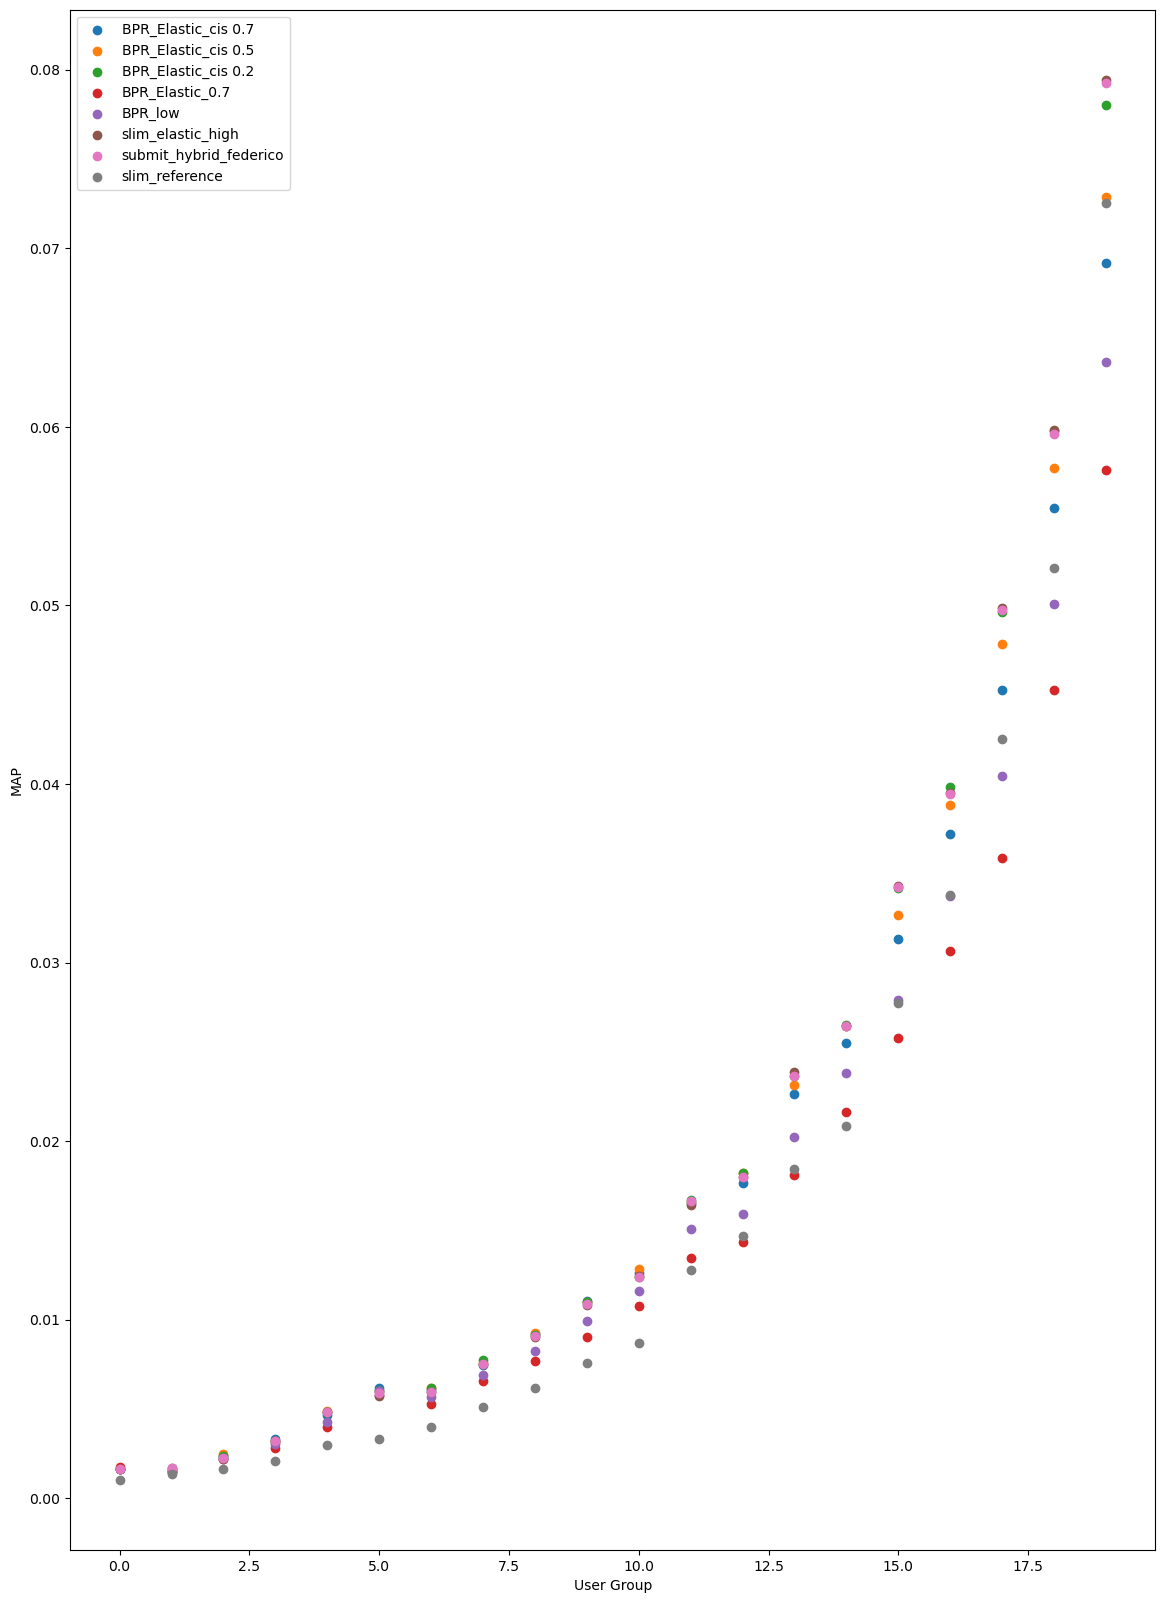

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline  

_ = plt.figure(figsize=(14, 20))
for label, recommender in reversed( recommender_object_dict.items()):
    results = MAP_recommender_per_group[label]
    plt.scatter(x=np.arange(0,len(results)), y=results, label=label,)
plt.ylabel('MAP')
plt.xlabel('User Group')
plt.legend()
plt.show()

In [15]:
evaluator_test = EvaluatorHoldout(URMv_test, [10])
ris, _ = evaluator_test.evaluateRecommender(slim_elastic_high)
ris

EvaluatorHoldout: Ignoring 1559 ( 3.7%) Users that have less than 1 test interactions


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 40070 (100.0%) in 24.76 sec. Users per second: 1618


,PRECISION,PRECISION_RECALL_MIN_DEN,RECALL,MAP,MAP_MIN_DEN,MRR,NDCG,F1,HIT_RATE,ARHR_ALL_HITS,...,COVERAGE_USER,COVERAGE_USER_HIT,USERS_IN_GT,DIVERSITY_GINI,SHANNON_ENTROPY,RATIO_DIVERSITY_HERFINDAHL,RATIO_DIVERSITY_GINI,RATIO_SHANNON_ENTROPY,RATIO_AVERAGE_POPULARITY,RATIO_NOVELTY
cutoff,,,,,,,,,,,,,,,,,,,,,
10,0.042855,0.072939,0.068376,0.021321,0.035733,0.141354,NaN,0.052688,0.282705,0.172032,...,0.96255,0.272118,0.96255,0.016824,8.968007,0.995176,0.038472,0.666857,3.618898,0.268092


### Altre prove

In [7]:
from Recommenders.KNN.ItemKNN_CFCBF_Hybrid_Recommender import ItemKNN_CFCBF_Hybrid_Recommender

knn = ItemKNN_CFCBF_Hybrid_Recommender(urm_def,mm.augmentedICM(ICMt, ICMl)) 
knn.fit(topK= 674, shrink= 613, similarity= 'cosine', normalize= True, feature_weighting='TF-IDF')

ItemKNN_CFCBF_HybridRecommender: URM Detected 2 ( 0.0%) users with no interactions.
Similarity column 27968 (100.0%), 2511.94 column/sec. Elapsed time 11.13 sec


In [8]:
from Recommenders.GraphBased.RP3betaRecommender import RP3betaRecommender

rp3beta_high = RP3betaRecommender(urm_bin)
# {'topK': 91, 'alpha': 0.7758215673815734, 'beta': 0.2719143753442684, 'normalize_similarity': True} -> MAP 0.0.0273508
rp3beta_high.fit( topK=91, alpha=0.7758215673815734, beta=0.2719143753442684, normalize_similarity=True )

RP3betaRecommender: URM Detected 3461 (12.4%) items with no interactions.
RP3betaRecommender: Similarity column 27968 (100.0%), 4321.31 column/sec. Elapsed time 6.47 sec


In [11]:
MAP_recommender_per_group = {}
recommender_object_dict = {}

recommender_class = {"knn" :knn,
                     "rp3beta_high" : rp3beta_high,
                     "slim_elastic_high" : slim_elastic_high,
                     "BPR_low": sslim_recommender,                               
                     
                     }


for label, recommender_obj in recommender_class.items():
    recommender_object_dict[label] = recommender_obj

In [14]:
cutoff = 10

for group_id in range(0, 20):
    
    start_pos = group_id*block_size
    end_pos = min((group_id+1)*block_size, len(profile_length))
    
    users_in_group = sorted_users[start_pos:end_pos]
    
    users_in_group_p_len = profile_length[users_in_group]
    
    print("Group {}, #users in group {}, average p.len {:.2f}, median {}, min {}, max {}".format(
        group_id, 
        users_in_group.shape[0],
        users_in_group_p_len.mean(),
        np.median(users_in_group_p_len),
        users_in_group_p_len.min(),
        users_in_group_p_len.max()))
    
    
    users_not_in_group_flag = np.isin(sorted_users, users_in_group, invert=True)
    users_not_in_group = sorted_users[users_not_in_group_flag]
    
    evaluator_test = EvaluatorHoldout(URMv_test, cutoff_list=[cutoff], ignore_users=users_not_in_group)
    
    for label, recommender in recommender_object_dict.items():
        result_df, _ = evaluator_test.evaluateRecommender(recommender)
        if label in MAP_recommender_per_group:
            MAP_recommender_per_group[label].append(result_df.loc[cutoff]["MAP"])
        else:
            MAP_recommender_per_group[label] = [result_df.loc[cutoff]["MAP"]]

Group 0, #users in group 2081, average p.len 6.98, median 7.0, min 2, max 9
EvaluatorHoldout: Ignoring 1559 ( 3.7%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 1625 (100.0%) in 1.46 sec. Users per second: 1116
EvaluatorHoldout: Processed 1625 (100.0%) in 1.15 sec. Users per second: 1419
EvaluatorHoldout: Processed 1625 (100.0%) in 1.82 sec. Users per second: 894
EvaluatorHoldout: Processed 1625 (100.0%) in 1.23 sec. Users per second: 1317
Group 1, #users in group 2081, average p.len 9.43, median 9.0, min 9, max 10
EvaluatorHoldout: Ignoring 1559 ( 3.7%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 1844 (100.0%) in 1.57 sec. Users per second: 1172
EvaluatorHoldout: Processed 1844 (100.0%) in 1.16 sec. Users per second: 1585
EvaluatorHoldout: Processed 1844 (100.0%) in 2.35 sec. Users per second: 785
EvaluatorHoldout: Processed 1844 (100.0%) in 1.95 sec

/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 2048 (100.0%) in 1.94 sec. Users per second: 1057


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 2048 (100.0%) in 1.26 sec. Users per second: 1632


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 2048 (100.0%) in 1.82 sec. Users per second: 1124


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 2048 (100.0%) in 1.22 sec. Users per second: 1676
Group 10, #users in group 2081, average p.len 19.75, median 20.0, min 19, max 21
EvaluatorHoldout: Ignoring 1559 ( 3.7%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 2047 (100.0%) in 1.98 sec. Users per second: 1036
EvaluatorHoldout: Processed 2047 (100.0%) in 1.25 sec. Users per second: 1635
EvaluatorHoldout: Processed 2047 (100.0%) in 1.86 sec. Users per second: 1103
EvaluatorHoldout: Processed 2047 (100.0%) in 1.20 sec. Users per second: 1700
Group 11, #users in group 2081, average p.len 21.44, median 21.0, min 21, max 22
EvaluatorHoldout: Ignoring 1559 ( 3.7%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 2064 (100.0%) in 2.00 sec. Users per second: 1030
EvaluatorHoldout: Processed 2064 (100.0%) in 1.26 sec. Users per second: 1642
EvaluatorHoldout: Processed 2064 (100.0%) 

/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2081 (100.0%) in 1.34 sec. Users per second: 1552


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2081 (100.0%) in 2.32 sec. Users per second: 899


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2081 (100.0%) in 1.27 sec. Users per second: 1634


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


Group 18, #users in group 2081, average p.len 54.12, median 54.0, min 48, max 62
EvaluatorHoldout: Ignoring 1559 ( 3.7%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 2081 (100.0%) in 2.40 sec. Users per second: 869


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2081 (100.0%) in 1.37 sec. Users per second: 1521


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2081 (100.0%) in 2.42 sec. Users per second: 859


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2081 (100.0%) in 1.30 sec. Users per second: 1606


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


Group 19, #users in group 2081, average p.len 87.91, median 78.0, min 62, max 281
EvaluatorHoldout: Ignoring 1559 ( 3.7%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 2081 (100.0%) in 2.64 sec. Users per second: 789
EvaluatorHoldout: Processed 2081 (100.0%) in 1.45 sec. Users per second: 1431
EvaluatorHoldout: Processed 2081 (100.0%) in 2.63 sec. Users per second: 792
EvaluatorHoldout: Processed 2081 (100.0%) in 1.38 sec. Users per second: 1512


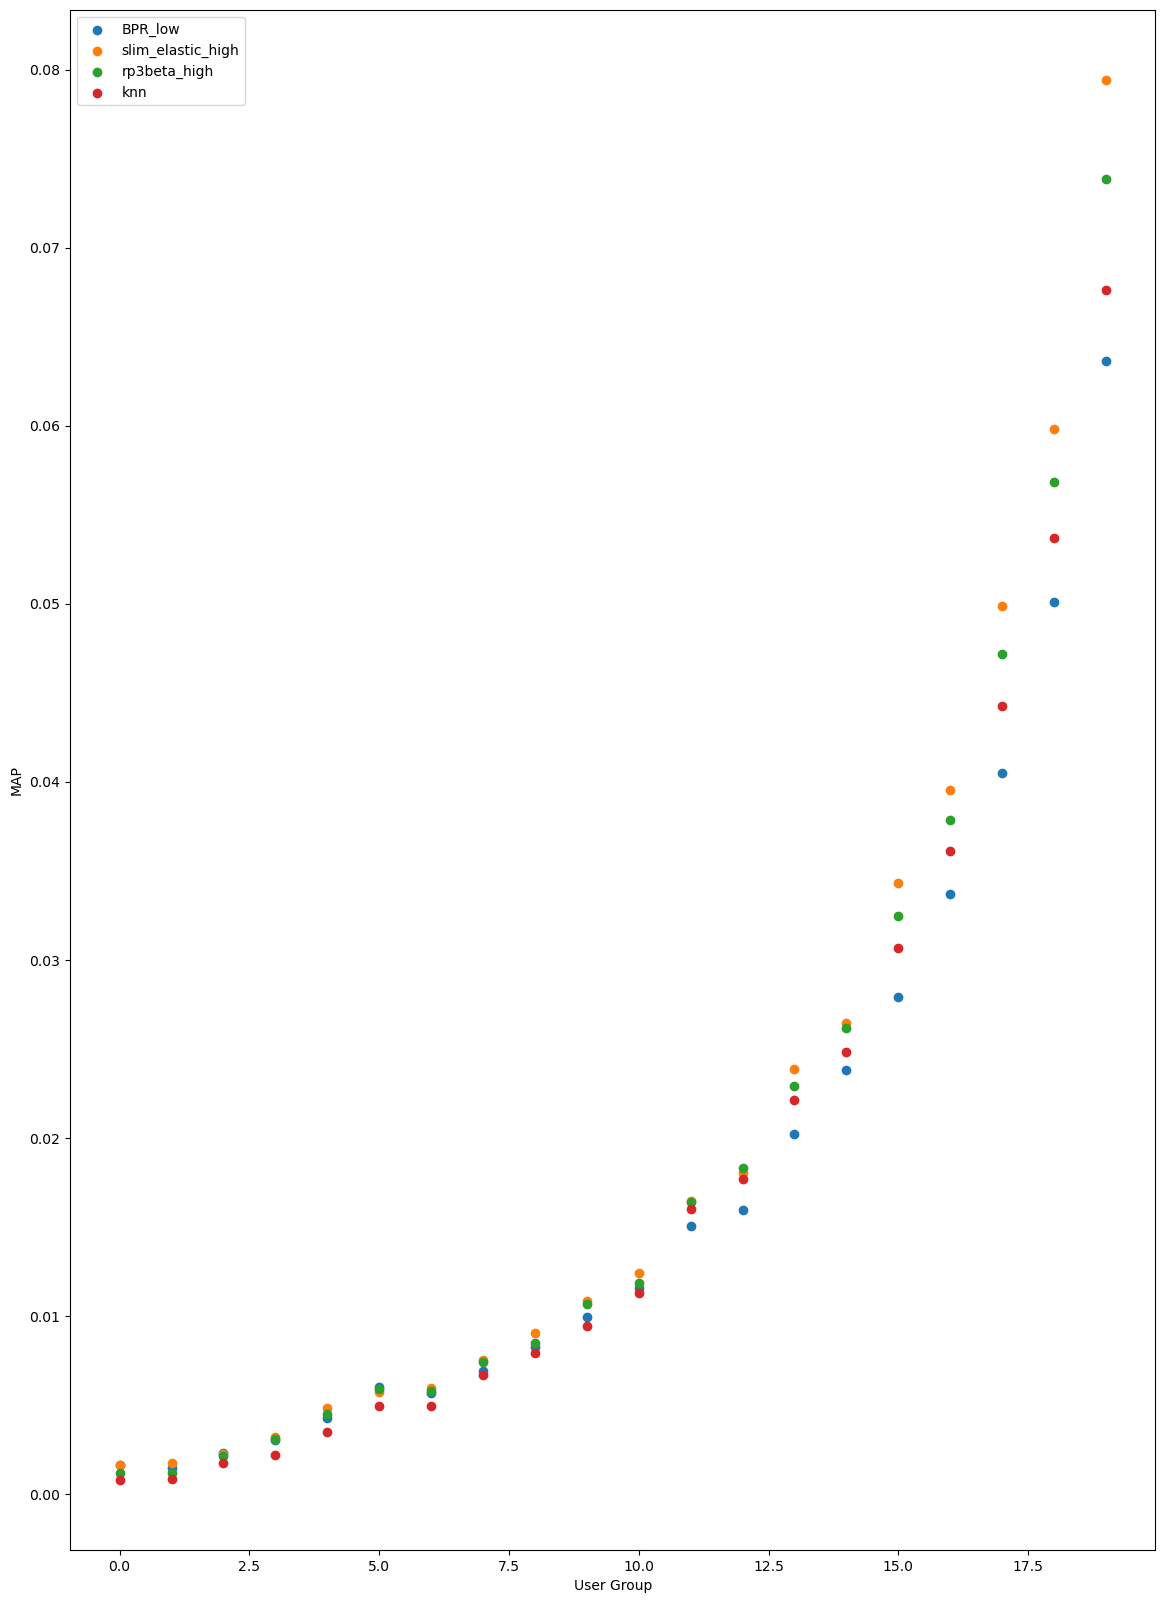

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline  

_ = plt.figure(figsize=(14, 20))
for label, recommender in reversed( recommender_object_dict.items()):
    results = MAP_recommender_per_group[label]
    plt.scatter(x=np.arange(0,len(results)), y=results, label=label,)
plt.ylabel('MAP')
plt.xlabel('User Group')
plt.legend()
plt.show()